Φορτώνουμε το MNIST data set κρατάμε 5 τυχαίες εικόνες για κάθε ένα από τους αριθμούς 3, 5, 8, 9.

In [25]:
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams
import pandas as pd
import skimage.measure
import cv2

In [6]:


(_, _), (images, labels) = tf.keras.datasets.mnist.load_data()
images = images.reshape([-1, 28, 28])
print(images.shape)
print(labels)

indices_3 = [i for i in range(len(images)) if labels[i] == 3]
indices_5 = [i for i in range(len(images)) if labels[i] == 5]
indices_8 = [i for i in range(len(images)) if labels[i] == 8]
indices_9 = [i for i in range(len(images)) if labels[i] == 9]

mylist=[]
mylist.extend(np.random.permutation(indices_3)[:5])
mylist.extend(np.random.permutation(indices_5)[:5])
mylist.extend(np.random.permutation(indices_8)[:5])
mylist.extend(np.random.permutation(indices_9)[:5])

(10000, 28, 28)
[7 2 1 ... 4 5 6]


Εμφανίζουμε τις  επιλεγμένες εικόνες.

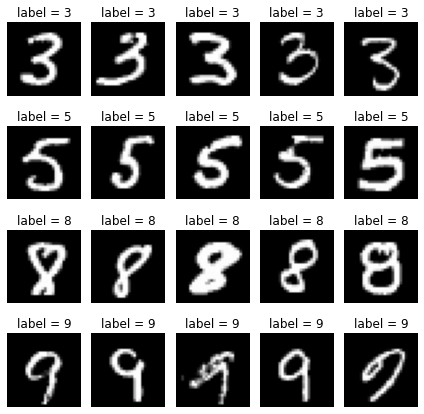

In [7]:
ROW = 4
COLUMN = 5
rcParams['figure.figsize'] = 6 ,6
for i in range(len(mylist)):
    # train[i][0] is i-th image data with size 28x28
    image = images[mylist[i]]   # not necessary to reshape if ndim is set to 2
    plt.subplot(ROW, COLUMN, i+1)          # subplot with size (width 3, height 5)
    plt.imshow(image, cmap='gray')  # cmap='gray' is for black and white picture.
    # train[i][1] is i-th digit label
    plt.title('label = {}'.format(labels[mylist[i]]))
    plt.axis('off')  # do not show axis value
plt.tight_layout()   # automatic padding between subplots
plt.show()

Φτιάχνουμε ένα καινούργιο dataframe στο οποίο θα αποθηκεύσουμε τα similarity matrices.  

In [8]:
#ex1 = example1, ex2 = example2 ...
columns = ['3_ex1', '3_ex2','3_ex3','3_ex4', '3_ex5',
           '5_ex1', '5_ex2','5_ex3','5_ex4', '5_ex5',
           '8_ex1', '8_ex2','8_ex3','8_ex4', '8_ex5',
           '9_ex1', '9_ex2','9_ex3','9_ex4', '9_ex5']

df = pd.DataFrame(columns=columns, index=columns)

Την ομοιότητα δυο αριθμών θα την μετρήσουμε με την μετρική SSIM.

In [13]:
def dist(imga, imgb):
    (score, _) = skimage.metrics.structural_similarity(imga, imgb, full=True)
    return float(score)

Μετράμε την απόσταση για κάθε πιθανό συνδυασμό και την αποθηκεύουμε στο dataframe. 

In [14]:
for i in range(len(mylist)):
    for j in range(len(mylist)):
        df.iat[i,j] = dist(images[mylist[i]], images[mylist[j]])

In [15]:
df[:5]

,3_ex1,3_ex2,3_ex3,3_ex4,3_ex5,5_ex1,5_ex2,5_ex3,5_ex4,5_ex5,8_ex1,8_ex2,8_ex3,8_ex4,8_ex5,9_ex1,9_ex2,9_ex3,9_ex4,9_ex5
3_ex1,1,0.504472,0.428768,0.440879,0.353271,0.121282,0.425195,0.353002,0.403322,0.255124,0.252946,0.108999,0.372121,0.279672,0.28909,0.134036,0.215889,0.170088,0.16694,0.124136
3_ex2,0.504472,1,0.348716,0.303578,0.210919,0.236365,0.322815,0.266125,0.329321,0.242182,0.213478,0.154379,0.260798,0.285874,0.178323,0.114457,0.187858,0.284486,0.111913,0.234116
3_ex3,0.428768,0.348716,1,0.311253,0.356999,0.210188,0.192462,0.154732,0.128062,0.291019,0.0913121,0.0384115,0.0858131,0.108463,0.320947,-0.0232734,0.0644542,0.0894545,0.0258614,-0.0343675
3_ex4,0.440879,0.303578,0.311253,1,0.23103,0.124689,0.311446,0.213217,0.217571,0.17269,0.191179,0.127978,0.130321,0.216094,0.24164,0.0584996,0.141453,0.0941916,0.0589322,0.127242
3_ex5,0.353271,0.210919,0.356999,0.23103,1,0.202558,0.179474,0.134495,0.0411627,0.179639,0.220611,0.0922478,0.0318206,0.0840315,0.268525,0.0815227,0.278563,0.117896,0.165915,0.0450622


Παρουσιάζουμε τα αποτελέσματα σε μορφή heatmap.

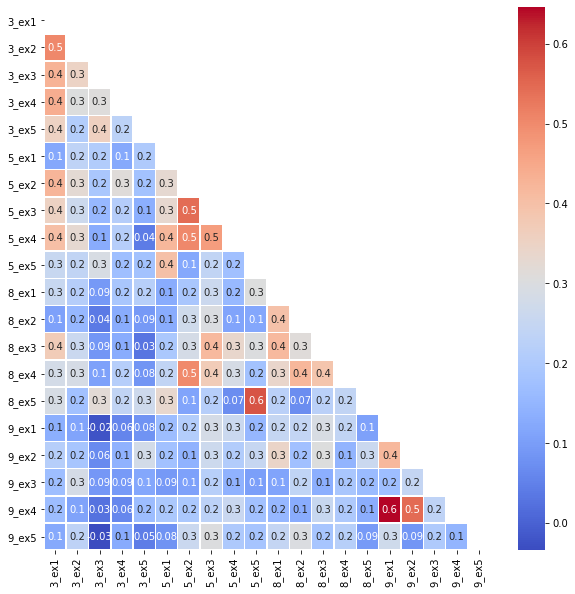

In [16]:
import seaborn as sns
import matplotlib.pyplot  as plt

f, ax = plt.subplots(figsize=(10, 10))
mask = np.triu(df.astype(float).corr())
ax = sns.heatmap(df.astype(float), linewidths=0.5, annot = True, fmt='.1g',
                cmap= 'coolwarm', mask = mask)

## Αποτυπώστε τις εικόνες στο πεδίο συχνοτήτων με χρήση του μετασχηματισμού Fourier.

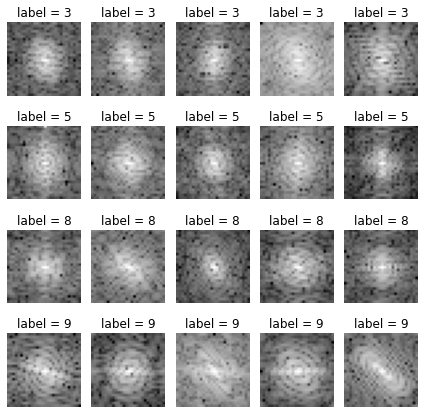

In [17]:
images_freq = []
for i in range(len(mylist)):
    
    f = np.fft.fft2(images[mylist[i]]) #find Fourier Transform
    fshift = np.fft.fftshift(f) #move zero frequency component (DC component) from top left to center

    #and calculate the magitude spectrum
    magnitude_spectrum = 20*np.log(np.abs(fshift))

    magnitude_spectrum_img = np.round(magnitude_spectrum).astype('uint8')
    
    images_freq.append(magnitude_spectrum_img)
    # train[i][0] is i-th image data with size 28x28
    image = magnitude_spectrum_img   # not necessary to reshape if ndim is set to 2
    plt.subplot(ROW, COLUMN, i+1)          # subplot with size (width 3, height 5)
    plt.imshow(image, cmap='gray')  # cmap='gray' is for black and white picture.
    # train[i][1] is i-th digit label
    plt.title('label = {}'.format(labels[mylist[i]]))
    plt.axis('off')  # do not show axis value
plt.tight_layout()   # automatic padding between subplots
plt.show()

Μετράμε την απόσταση για κάθε πιθανό συνδυασμό και την αποθηκεύουμε στο dataframe. 

In [19]:
df[:5]

,3_ex1,3_ex2,3_ex3,3_ex4,3_ex5,5_ex1,5_ex2,5_ex3,5_ex4,5_ex5,8_ex1,8_ex2,8_ex3,8_ex4,8_ex5,9_ex1,9_ex2,9_ex3,9_ex4,9_ex5
3_ex1,1,0.504472,0.428768,0.440879,0.353271,0.121282,0.425195,0.353002,0.403322,0.255124,0.252946,0.108999,0.372121,0.279672,0.28909,0.134036,0.215889,0.170088,0.16694,0.124136
3_ex2,0.504472,1,0.348716,0.303578,0.210919,0.236365,0.322815,0.266125,0.329321,0.242182,0.213478,0.154379,0.260798,0.285874,0.178323,0.114457,0.187858,0.284486,0.111913,0.234116
3_ex3,0.428768,0.348716,1,0.311253,0.356999,0.210188,0.192462,0.154732,0.128062,0.291019,0.0913121,0.0384115,0.0858131,0.108463,0.320947,-0.0232734,0.0644542,0.0894545,0.0258614,-0.0343675
3_ex4,0.440879,0.303578,0.311253,1,0.23103,0.124689,0.311446,0.213217,0.217571,0.17269,0.191179,0.127978,0.130321,0.216094,0.24164,0.0584996,0.141453,0.0941916,0.0589322,0.127242
3_ex5,0.353271,0.210919,0.356999,0.23103,1,0.202558,0.179474,0.134495,0.0411627,0.179639,0.220611,0.0922478,0.0318206,0.0840315,0.268525,0.0815227,0.278563,0.117896,0.165915,0.0450622


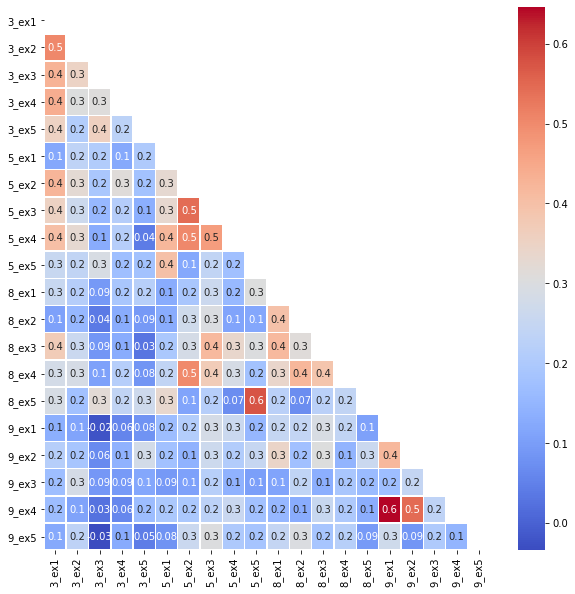

In [20]:
f, ax = plt.subplots(figsize=(10, 10))
mask = np.triu(df.astype(float).corr())
ax = sns.heatmap(df.astype(float), linewidths=0.5, annot = True, fmt='.1g',
                cmap= 'coolwarm', mask = mask)

Εφαρμόζουμε high pass filtering για να δώσουμε έμφαση στις ακμές.

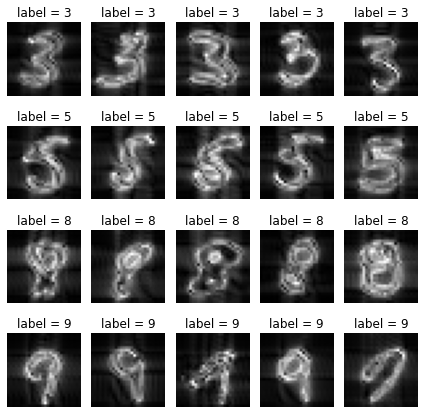

In [21]:
images_freq_highPass = []
for i in range(len(mylist)):
    
    f = np.fft.fft2(images[mylist[i]]) #find Fourier Transform
    fshift = np.fft.fftshift(f) #move zero frequency component (DC component) from top left to center

    rows, cols = images[mylist[i]].shape
    crow,ccol = rows//2, cols//2
    fshift[crow-30:crow+30, ccol-30:ccol+30] = 0

    #now you go back to the original image
    f_ishift = np.fft.ifftshift(fshift) # get DC back to original space
    img_back = np.fft.ifft2(f_ishift)
    img_back = np.abs(img_back) #we need this for the opencv library
    
    images_freq_highPass.append(img_back)
    
    plt.subplot(ROW, COLUMN, i+1)          # subplot with size (width 3, height 5)
    plt.imshow(img_back, cmap='gray')  # cmap='gray' is for black and white picture.
    # train[i][1] is i-th digit label
    plt.title('label = {}'.format(labels[mylist[i]]))
    plt.axis('off')  # do not show axis value
plt.tight_layout()   # automatic padding between subplots
plt.show()

In [22]:
for i in range(len(images_freq_highPass)):
    for j in range(len(images_freq_highPass)):
        df.iat[i,j] = dist(images_freq_highPass[i], images_freq_highPass[j])

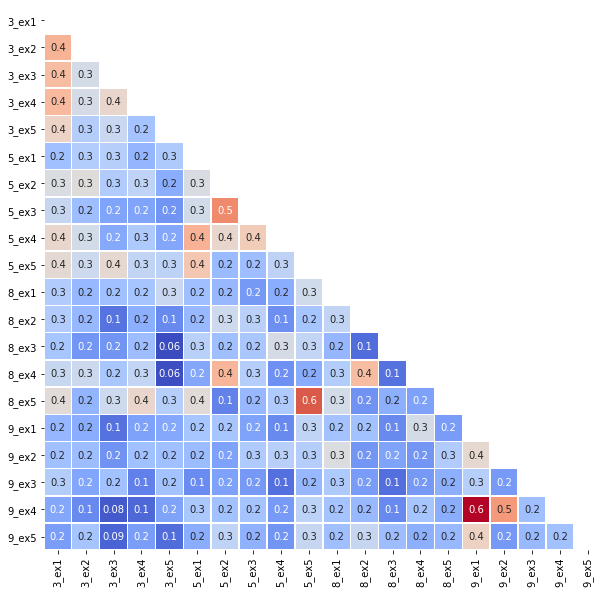

In [23]:
f, ax = plt.subplots(figsize=(10, 10))
mask = np.triu(df.astype(float).corr())
ax = sns.heatmap(df.astype(float), linewidths=0.5, annot = True, fmt='.1g',
                cmap= 'coolwarm', cbar=False, mask = mask)

Μετά το high pass filtering βλέπουμε καλύτερα αποτελέσματα καθώς τα 9 μοιάζουν περισσότερο μεταξύ τους σε σχέση με το πεδίο του χώρου. Επίσης τα 9 με τα 3 μοιάζουν περισσότερο καθώς και τα 8 με τα 5.

Εφαρμόζουμε low pass filtering.

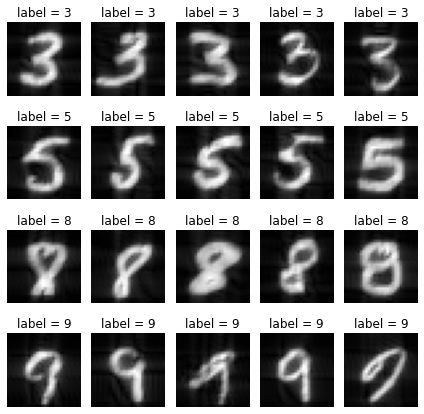

In [26]:
images_freq_lowpass = []
for i in range(len(mylist)):
    
    dft = cv2.dft(np.float32(images[mylist[i]]),flags = cv2.DFT_COMPLEX_OUTPUT)
    dft_shift = np.fft.fftshift(dft) #move zero frequency component (DC component) from top left to center

    #and calculate the magitude spectrum
    magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
    
    rows, cols = images[mylist[i]].shape
    crow,ccol = rows//2 , cols//2
    mask = np.zeros((rows,cols,2),np.uint8)
    mask[crow-30:crow+30, ccol-30:ccol+30] = 1
    fshift = dft_shift*mask
    f_ishift = np.fft.ifftshift(fshift)
    img_back = cv2.idft(f_ishift)
    img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])
#     magnitude_spectrum_img = np.round(magnitude_spectrum).astype('uint8')
    
    images_freq_lowpass.append(img_back)
    
   
    image = img_back   # not necessary to reshape if ndim is set to 2
    plt.subplot(ROW, COLUMN, i+1)          # subplot with size (width 3, height 5)
    plt.imshow(image, cmap='gray')  # cmap='gray' is for black and white picture.
    # train[i][1] is i-th digit label
    plt.title('label = {}'.format(labels[mylist[i]]))
    plt.axis('off')  # do not show axis value
plt.tight_layout()   # automatic padding between subplots
plt.show()

In [27]:
for i in range(len(images_freq_lowpass)):
    for j in range(len(images_freq_lowpass)):
        df.iat[i,j] = dist(images_freq_lowpass[i], images_freq_lowpass[j])

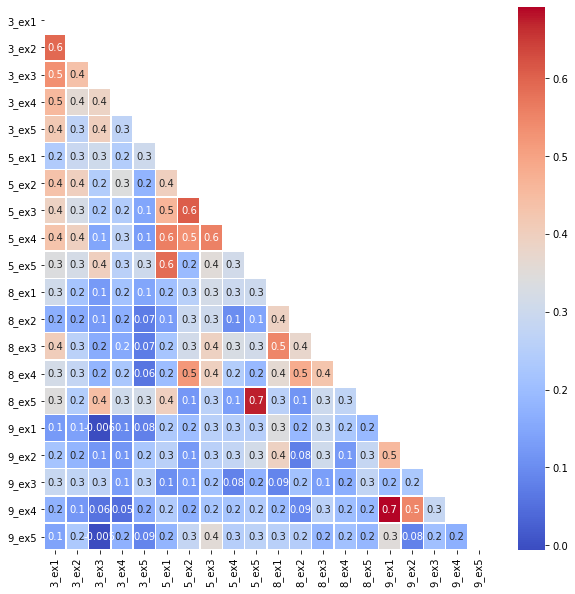

In [28]:
f, ax = plt.subplots(figsize=(10, 10))
mask = np.triu(df.astype(float).corr())
ax = sns.heatmap(df.astype(float), linewidths=0.5, annot = True, fmt='.1g',
                cmap= 'coolwarm', mask = mask)

Μετά το low pass filtering βλέπουμε χειρότερα αποτελέσματα καθώς μονο τα 5 μοιάζουν μεταξύ τους.